In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X_train = np.r_[np.random.normal(3,1, size=50), np.random.normal(-1,8, size=50)].reshape((100, -1))
y_train = np.r_[np.ones(50), np.zeros(50)]

In [9]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.predict_proba([[0],[1],[2]])[:, 1]

array([0.47282711, 0.51422694, 0.55543246])

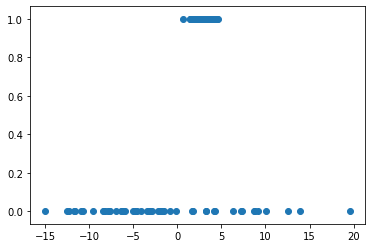

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)

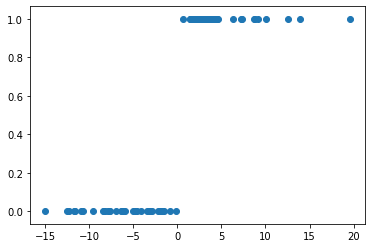

In [15]:
y_pred = model.predict(X_train)
plt.scatter(X_train, y_pred)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_train, y_pred)
print(cm)

print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred))
print(recall_score(y_train, y_pred))

[[34 16]
 [ 0 50]]
0.84
0.7575757575757576
1.0


In [21]:
from sklearn.metrics import  roc_curve

probas = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, probas[:, 1])

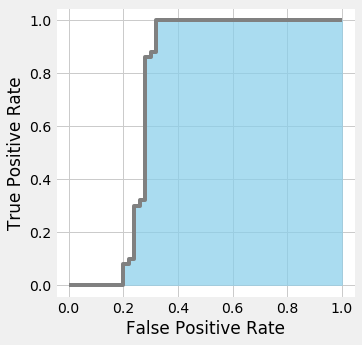

In [23]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')

ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=.7)

ax.set_xlabel('False Positive Rate')

ax.set_ylabel('True Positive Rate')

ax.set_facecolor('xkcd:white')

plt.show()